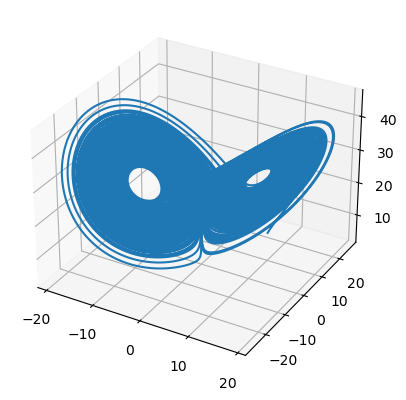

  5.895379 seconds (51.73 M allocations: 1.268 GiB, 4.74% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f2b459ecdc0>

In [1]:
@time include("RKF45-3d.jl")

In [1]:
using Pkg;
Pkg.add("FunctionIntegrator");
using FunctionIntegrator;

function thetadotroot(x0,theta0,thetadot0,g,l,tol)
    func = 1;
    x = x0;
    while (abs(func) > tol)
        func = thetadot0^2+2*g/l*(sin(theta0)-sin(x));
        deltax = - (func)/(-2*g/l*cos(x));
        x += deltax;
    end
    return x
end

n = 22;
theta0 = (n-1)*pi/(2*n);
thetadot0 = 0.1;
g = 9.81;
l = 1;
finalthetaguess = -pi-theta0;
N = 1e8;
finaltheta = thetadotroot(finalthetaguess, theta0, thetadot0, g, l, 1e-15);
T = 2*abs(chebyshev_quadrature(x -> 1/sqrt(abs(thetadot0^2+2*g/l*(sin(theta0)-sin(x)))), N, 2, theta0, finaltheta))+1;

function f(x,y, dy)
    return [dy, -g/l*cos(y)];
end

function rkf45(t0, tf, theta0, dtheta0, epsilon)
    h = 0.1;
    x = Float64[t0];
    xfinal = tf;
    y = Float64[theta0];
    dy = Float64[dtheta0];
    error_in_y = Float64[0];
    i = 1;
    while x[i]<xfinal
        h = min(h, xfinal-x[i]);
        K1 = h*f(x[i],y[i], dy[i]);
        k1 = K1[1];
        l1 = K1[2];
        K2 = h*f(x[i]+h/4, y[i]+k1/4, dy[i]+l1/4);
        k2 = K2[1];
        l2 = K2[2];
        K3 = h*f(x[i]+3*h/8, y[i]+3*k1/32+9*k2/32, dy[i]+3*l1/32+9*l2/32);
        k3 = K3[1];
        l3 = K3[2];
        K4 = h*f(x[i]+12*h/13, y[i]+1932*k1/2197-7200*k2/2197+7296*k3/2197, dy[i]+1932*l1/2197-7200*l2/2197+7296*l3/2197);
        k4 = K4[1];
        l4 = K4[2];
        K5 = h*f(x[i]+h, y[i]+439*k1/216-8*k2+3680*k3/513-845*k4/4104, dy[i]+439*l1/216-8*l2+3680*l3/513-845*l4/4104);
        k5 = K5[1];
        l5 = K5[2];
        K6 = h*f(x[i]+h/2, y[i]-8*k1/27+2*k2-3544*k3/2565+1859*k4/4104-11*k5/40, dy[i]-8*l1/27+2*l2-3544*l3/2565+1859*l4/4104-11*l5/40);
        k6 = K6[1];
        l6 = K6[2];
        y1 = y[i] + 25*k1/216+1408*k3/2565+2197*k4/4104-k5/5;
        dy1 = dy[i] + 25*l1/216+1408*l3/2565+2197*l4/4104-l5/5;
        y2 = y[i] + 16*k1/135+6656*k3/12825+28561*k4/56430-9*k5/50+2*k6/55;
        dy2 = dy[i] + 16*l1/135+6656*l3/12825+28561*l4/56430-9*l5/50+2*l6/55;
        R = abs(y1-y2)/h;
        s = 0.84*(epsilon/R)^(1/4);
        if R<=epsilon
            push!(x, x[i]+h)
            push!(y, y1)
            push!(dy, dy1)
            i += 1;
            h *= s;
        else
            h *= s;
        end
    end
    return [x, y, dy]
end

t0 = 0;
tf = T;
epsilon = 1e-12;
x, y, dy = rkf45(t0, tf, theta0, thetadot0, epsilon);
xx = LinRange(t0, tf, Int64(1e7+1));

using Plots

@userplot CirclePlot
@recipe function f(cp::CirclePlot)
    x, y, i = cp.args
    n = length(x)
    inds = circshift(1:n, 1 - i)
    linewidth --> range(0, 10, length = n)
    seriesalpha --> range(0, 1, length = n)
    aspect_ratio --> 1
    label --> false
    x[inds], y[inds]
end

n = length(y)

anim = @animate for i ∈ 1:n
    circleplot(y, dy, i)
end

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


Animation("/tmp/jl_jw3Jr3", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "004220.png", "004221.png", "004222.png", "004223.png", "004224.png", "004225.png", "004226.png", "004227.png", "004228.png", "004229.png"])

In [22]:
?f

search: f fd for fma fld fld1 fill fdio flag frexp foldr foldl flush floor float



```
f(t, x, y, z)
```

The right-hand side of the coupled system of 3 ODEs defined by the equation:

$\dfrac{d\vec{r}}{dt} = f(t, x, y, z)$.


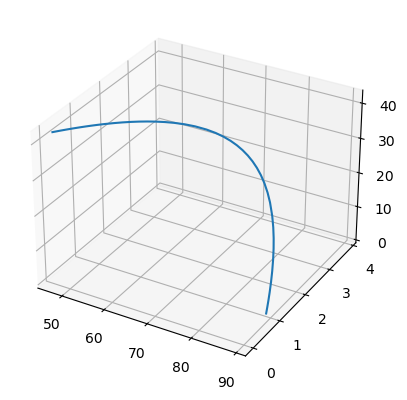

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7fe188a92fd0>

In [10]:
include("RKF45-3d_SIR.jl")

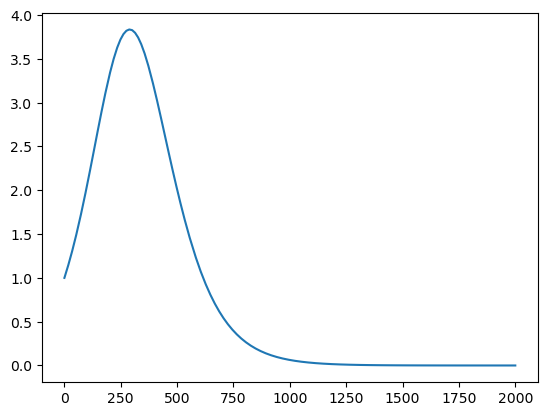

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe188a72a30>

In [11]:
plot(t,I)

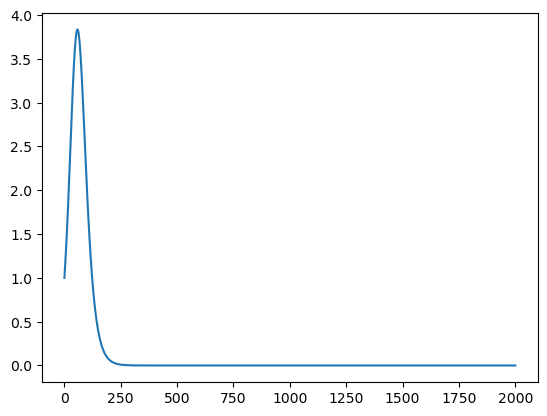

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe1889d8c40>

In [12]:
t5, S5, I5, R5 = RKF45(f, dtInitial, 0.5, epsilon, t0, tf, S0, I0, R0);

plot(t5,I5)